In [1]:
# 현재 노트북의 위치를 확인하기
%pwd

'C:\\Users\\home\\dataitgirls\\open-data-shop'

In [2]:
# 현재 위치에 있는 파일을 확인하기
%ls

 C 드라이브의 볼륨: S3A4924D002
 볼륨 일련 번호: 62EA-1054

 C:\Users\home\dataitgirls\open-data-shop 디렉터리

2018-08-10  오전 10:09    <DIR>          .
2018-08-10  오전 10:09    <DIR>          ..
2018-08-09  오후 03:31                39 .gitignore
2018-08-10  오전 09:10    <DIR>          .ipynb_checkpoints
2018-08-10  오전 09:03    <DIR>          data
2018-08-10  오전 10:09         2,128,893 hospital+pharm.ipynb
2018-08-09  오후 03:31             1,090 LICENSE
2018-08-09  오후 04:41            14,540 open-data-shop.ipynb
               4개 파일           2,144,562 바이트
               4개 디렉터리  220,964,364,288 바이트 남음


In [3]:
# data 폴더 안에 있는 파일을 확인하기
%ls data

 C 드라이브의 볼륨: S3A4924D002
 볼륨 일련 번호: 62EA-1054

 C:\Users\home\dataitgirls\open-data-shop\data 디렉터리

2018-08-10  오전 09:03    <DIR>          .
2018-08-10  오전 09:03    <DIR>          ..
2018-07-25  오후 02:53       212,900,223 201806_01.csv
2018-07-25  오후 03:00       197,851,676 201806_02.csv
2018-07-25  오후 04:58       336,210,823 201806_03.csv
2018-07-25  오후 04:36       305,842,209 201806_04.csv
               4개 파일       1,052,804,931 바이트
               2개 디렉터리  220,964,364,288 바이트 남음


In [4]:
import pandas as pd

In [5]:
# 01파일을 읽어오기
df_shop = pd.read_csv('data/201806_01.csv', encoding='cp949')

In [6]:
# data 행과 열을 알아보기
df_shop.shape

(476183, 39)

In [7]:
# data의 첫 5개를 알아보기
df_shop.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,28523551,엘가커피부산아시아드점,부산아시아드점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2647010100111980000009422,부산아시아드주경기장노외주차장,부산광역시 연제구 종합운동장로 7,611070,47500.0,NaN,1,NaN,129.062034,35.191284
1,28498271,비비안아울렛중계점,아울렛중계점,D,소매,D05,의복의류,D05A07,셔츠/내의/속옷,NaN,...,1135010600105090000010511,2001아울렛,서울특별시 노원구 동일로204가길 46,139726,1783.0,NaN,3,NaN,127.067888,37.641280
2,28512174,연세정신건강의학과의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,...,1111017400102990000005842,유림문화사,서울특별시 종로구 종로 335-3,110540,3104.0,NaN,2,NaN,127.014500,37.573196
3,28499926,독일지멘스보청기은평점,은평점,D,소매,D20,의약/의료품소매,D20A02,보청기판매,G47812,...,1138010300102810108040063,NaN,서울특별시 은평구 통일로 732,122040,3368.0,NaN,2,NaN,126.929871,37.610888
4,28490321,서울모드,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010700105170027011767,SM빌딩,서울특별시 강남구 도산대로11길 29,135888,6034.0,NaN,1,NaN,127.022212,37.519315


In [8]:
# conda install -c conda-forge plotnine
from plotnine import *
# conda install -c conda-forge ggplot
# conda install -c ioos folium
# conda install branca conda install folium
!pip install folium
import folium

C:\Users\home\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\home\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


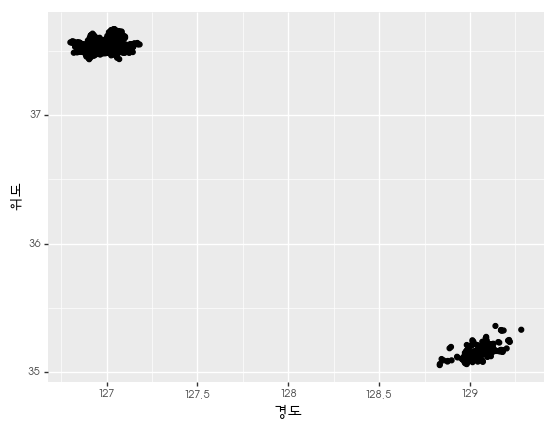

<ggplot: (35718685)>

In [9]:
(ggplot(df_shop[:1000])
  + aes(x='경도', y='위도')
  + geom_point()
  + theme(text=element_text(family='HYnamM'))
)

In [10]:
# 서울 상권 정보만 가져와보자
df_seoul = df_shop.loc[df_shop['시도명'].str.startswith('서울')].copy()
df_seoul.shape

(330089, 39)

In [11]:
# 대분류에 무엇이 있는지 알아보기
df_seoul['상권업종대분류명'].value_counts()

음식          109766
소매          101297
생활서비스        52728
학문/교육        26294
의료           15144
부동산          12905
관광/여가/오락      9165
숙박            2744
스포츠             46
Name: 상권업종대분류명, dtype: int64

In [12]:
# 중분류에는 무엇이 있는지 알아보기
df_seoul['상권업종중분류명'].value_counts()

한식               35778
이/미용/건강          25140
종합소매점            21678
의복의류             18410
커피점/카페           14906
유흥주점             13799
부동산중개            12245
분식               10861
병원               10518
음/식료품소매           9615
가정/주방/인테리어        8028
일식/수산물            7792
세탁/가사서비스          7381
닭/오리요리            5938
학원-보습교습입시         5859
사진/광학/정밀기기소매      5715
양식                5450
자동차/이륜차           5090
가방/신발/액세서리        5038
화장품소매             4897
유아교육              4864
패스트푸드             4605
학원기타              4539
제과제빵떡케익           4524
사무/문구/컴퓨터         4074
무도/유흥/가무          3968
학원-음악미술무용         3733
PC/오락/당구/볼링등      3460
약국/한약방            3232
건강/미용식품           3087
                 ...  
대행업                485
중고품소매/교환           479
주유소/충전소            446
예술품/골동품/수석/분재      407
학문교육기타             399
부페                 393
행사/이벤트             322
경마/경륜/성인오락         296
기타음식업              282
연극/영화/극장           270
학원-자격/국가고시         244
애견/애완/동물           238
유아용품       

In [13]:
df_medical = df_seoul.loc[df_seoul['상권업종대분류명'].str.contains('의료')]
df_medical.shape

(15144, 39)

C:\Users\home\Anaconda3\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Users\home\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\home\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\home\Anaconda3\lib\site-packages\plotnine\positions\position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


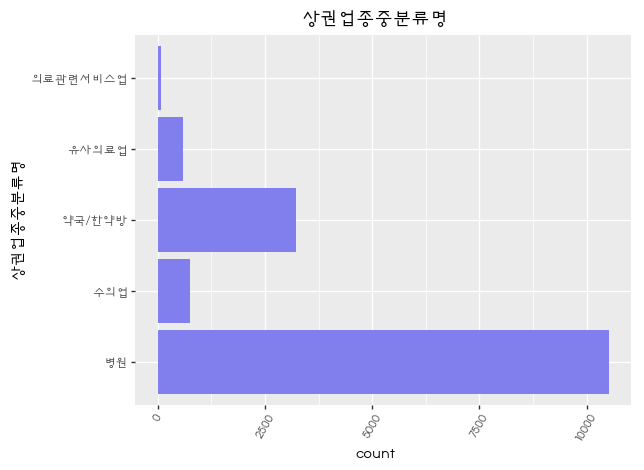

<ggplot: (-9223372036818837907)>

In [14]:
(ggplot(df_medical)
 + aes('상권업종중분류명')
 + geom_bar(fill='#817FEE')
 + ggtitle('상권업종중분류명')
 + coord_flip()
 + theme(text=element_text(family='HYnamM'),
        axis_text_x=element_text(rotation=60))
)

In [15]:
# 한글 폰트 설정하기

# %matplotlib inline

# import matplotlib as mpl
# import matplotlib.pyplot as plt
# import matplotlib.font_manager as fm

In [16]:
# print ('버전: ', mpl.__version__)
# print ('설치 위치: ', mpl.__file__)
# print ('설정 위치: ', mpl.get_configdir())
# print ('캐시 위치: ', mpl.get_cachedir())

In [17]:
# print ('설정파일 위치: ', mpl.matplotlib_fname())

In [18]:
# 우리조 프로젝트와 관련하여 병원과 약국 정보만 가져와보자.
# 의료 대분류 중 13750건이 차지한다.

df_medical = df_seoul.loc[df_seoul['상권업종중분류명'].str.contains('병원|약국')].copy()
df_medical.shape

(13750, 39)

In [19]:
df_medical.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [20]:
# 필요한 column만 가져와보기
df_medical = df_medical[['상호명', '상권업종대분류명', '상권업종중분류명', '지번주소', '도로명주소', '위도', '경도', '시군구명']]
df_medical.columns

Index(['상호명', '상권업종대분류명', '상권업종중분류명', '지번주소', '도로명주소', '위도', '경도', '시군구명'], dtype='object')

In [21]:
df_medical['상호명'].value_counts()

온누리약국         22
조은약국          16
푸른약국          12
수약국           12
봄약국           11
서울의원          11
경희한의원         11
중앙약국          11
서울치과          10
진약국           10
태평양약국         10
그린약국           9
연세치과의원         9
건강약국           9
튼튼약국           9
드림약국           9
늘푸른약국          9
다나약국           8
행복한약국          8
연세재활의학과의원      8
열린약국           8
우리약국           8
연세약국           7
이화약국           7
서울가정의학과의원      7
함소아한의원         7
안아픈세상한의원       7
소망약국           7
성심약국           7
사랑약국           7
              ..
기억치과의원         1
서울실버한방병원       1
여의신광한의원        1
에이스메디칼요양병원     1
박영수치과의원        1
성가약국           1
어울림온누리약국       1
민동환치과          1
우리소아청소년과       1
바른정재활의학과의원     1
서울굿모닝치과        1
장외과            1
두서울치과          1
진성치과의원         1
박영승정형외과        1
서상현한의원         1
새전일약국          1
닥터스마일의원        1
추성욱치과의원        1
제주숲한의원         1
애플산부인과네트워크     1
청량리중앙약국        1
연세엠이비인후과의원     1
녹향제약           1
한솔내과의원         1
태릉본비뇨기과의원      1
김천수한의원         1
연세진치과         

In [22]:
df_medical.head()

,상호명,상권업종대분류명,상권업종중분류명,지번주소,도로명주소,위도,경도,시군구명
2,연세정신건강의학과의원,의료,병원,서울특별시 종로구 창신동 297,서울특별시 종로구 종로 335-3,37.573196,127.014500,종로구
105,코원성형외과,의료,병원,서울특별시 강남구 신사동 592-4,서울특별시 강남구 논현로 826,37.522223,127.028531,강남구
110,헬로스마일소아과,의료,병원,서울특별시 강남구 논현동 39-18,서울특별시 강남구 논현로131길 30,37.514144,127.027878,강남구
125,진흥약국,의료,약국/한약방,서울특별시 강동구 둔촌동 630,서울특별시 강동구 명일로 172,37.534135,127.145055,강동구
126,아미가성형외과,의료,병원,서울특별시 서초구 방배동 902-1,서울특별시 서초구 방배로20길 4,37.485498,126.995334,서초구


In [23]:
df_medical['위도'] = df_medical['위도'].astype(float)
df_medical['경도'] = df_medical['경도'].astype(float)

C:\Users\home\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\home\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


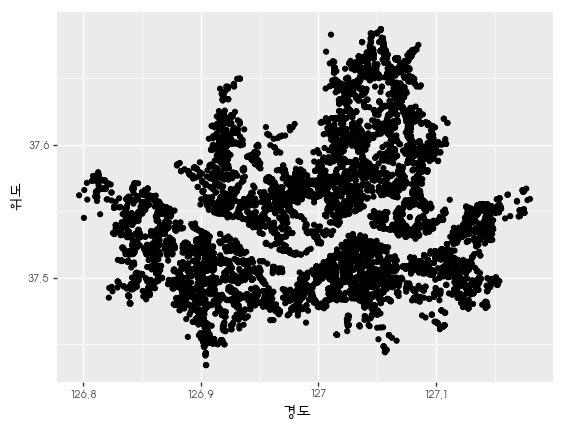

<ggplot: (-9223372036818823904)>

In [24]:
# 서울시에 있는 병원을 그려보기
(ggplot(df_medical)
 + aes(x='경도', y='위도')
 + geom_point()
 + theme(text=element_text(family='HYnamM'))
)

In [25]:
# 병원과 약국을 분류하여 그려보자.
# 의료라는 column을 새로 만들자.
df_medical['의료'] = ''

In [26]:
df_medical.loc[df_medical['상권업종중분류명'].str.contains('병원'), '의료'] = '병원'
df_medical.loc[df_medical['상권업종중분류명'].str.contains('약국'), '의료'] = '약국'

df_medical.head(20)

,상호명,상권업종대분류명,상권업종중분류명,지번주소,도로명주소,위도,경도,시군구명,의료
2,연세정신건강의학과의원,의료,병원,서울특별시 종로구 창신동 297,서울특별시 종로구 종로 335-3,37.573196,127.014500,종로구,병원
105,코원성형외과,의료,병원,서울특별시 강남구 신사동 592-4,서울특별시 강남구 논현로 826,37.522223,127.028531,강남구,병원
110,헬로스마일소아과,의료,병원,서울특별시 강남구 논현동 39-18,서울특별시 강남구 논현로131길 30,37.514144,127.027878,강남구,병원
125,진흥약국,의료,약국/한약방,서울특별시 강동구 둔촌동 630,서울특별시 강동구 명일로 172,37.534135,127.145055,강동구,약국
126,아미가성형외과,의료,병원,서울특별시 서초구 방배동 902-1,서울특별시 서초구 방배로20길 4,37.485498,126.995334,서초구,병원
129,씨앤미치과,의료,병원,서울특별시 강동구 천호동 447,서울특별시 강동구 천호대로 1097,37.535510,127.133509,강동구,병원
131,오리진,의료,병원,서울특별시 강남구 신사동 570-3,서울특별시 강남구 논현로167길 15,37.524434,127.026817,강남구,병원
154,이즈타워약,의료,약국/한약방,서울특별시 강남구 역삼동 821,서울특별시 강남구 테헤란로 101,37.498656,127.028023,강남구,약국
196,신세계약국,의료,약국/한약방,서울특별시 중랑구 신내동 646,서울특별시 중랑구 신내로 211,37.616424,127.092597,중랑구,약국
289,새롬성형외과,의료,병원,서울특별시 영등포구 영등포동4가 425-37,서울특별시 영등포구 경인로 835,37.516310,126.905647,영등포구,병원


In [27]:
# 상호명으로 분류를 깔끔하게 할 수 있는 방법은 없을까...
#df_medical['의료'].value_counts()
# 약국보다 병원이 3배정도 많이 존재함을 알 수 있다.

In [28]:
# 위도와 경도를 숫자로 바꿔준다.

df_medical['위도'] = df_medical['위도'].astype(float)
df_medical['경도'] = df_medical['경도'].astype(float)

C:\Users\home\Anaconda3\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Users\home\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\home\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


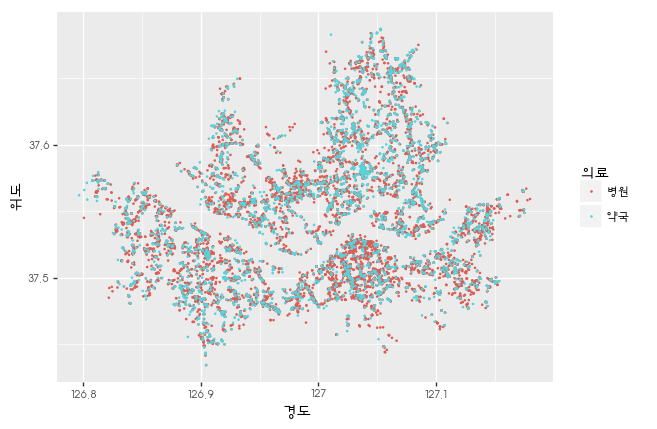

<ggplot: (35948552)>

In [29]:
# 지도로 나타내어보자.

(ggplot(df_medical)
 + aes(x='경도', y='위도', color='의료')
 + geom_point(size=0.05)
 + theme(text=element_text(family='HYnamM'))
 #+ scale_fill_gradient(low = 'darkgreen', high = 'red') 
)
# 점의 크기를 작게 
# 색상의 순서를 반대로?
# scale_fill_gradient


In [30]:
# folium에서 data가 너무 커 그려지지 않기 때문에 상위 1000개만 선별
df_medi = df_medical[:1000]
df_medi.shape

(1000, 9)

In [31]:
# folium으로 나타내보기
    
import folium
geo_df = df_medi.copy()

map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=10)

for n in geo_df.index:
    popup_name = geo_df['의료'][n] + ' - ' + geo_df['도로명주소'][n]
    if geo_df['의료'][n] == '병원' :
        icon_color = 'pink'
    else:
        icon_color = 'blue'
        
    folium.Marker([geo_df['위도'][n], geo_df['경도'][n]], 
                  popup=popup_name, 
                  icon=folium.Icon(color=icon_color)).add_to(map)
    
map
# 지도가 보이지 않는 것은 data가 너무 커서이므로 줄여서 찍어보는 것이 좋다.